In [77]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
def f(x):
    for i in range(x):
        inside.append(i+1)

In [131]:
df_sept=pd.read_csv("MyCall_Data_September_2019.csv")
df_oct=pd.read_csv("MyCall_Data_October_2019.csv")
df_nov=pd.read_csv("MyCall_Data_November_2019.csv")
len_sept=len(df_sept.index)
len_oct=len(df_oct.index)
len_nov=len(df_nov.index)
df_res=pd.concat([df_sept,df_oct,df_nov])
df_res

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,RJio,Indoor,4G,4,Satisfactory,12.691526,78.635086,Tamil Nadu
1,RJio,Outdoor,4G,4,Satisfactory,-1.000000,-1.000000,NaN
2,RJio,Outdoor,4G,4,Satisfactory,-1.000000,-1.000000,NaN
3,Airtel,Outdoor,4G,5,Satisfactory,25.594805,85.220971,Bihar
4,Airtel,Indoor,4G,5,Satisfactory,25.595471,85.221376,Bihar
...,...,...,...,...,...,...,...,...
33807,Vodafone,Indoor,4G,5,Satisfactory,18.185603,79.942530,Telangana
33808,Vodafone,Indoor,Unknown,1,Poor Voice Quality,8.660650,77.075048,Kerala
33809,RJio,Indoor,4G,5,Satisfactory,18.677054,73.744747,Maharashtra
33810,RJio,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN


In [79]:
#multi index  
ls1=["September"]*len_sept
ls2=["October"]*len_oct
ls3=["November"]*len_nov
out=ls1+ls2+ls3
inside=[]
f(len_sept)
f(len_oct)
f(len_nov)
multi_index=list(zip(out,inside))
multi_index=pd.MultiIndex.from_tuples(multi_index)
df_coll=df_res
df_coll.set_index(multi_index,inplace=True)
df_coll

Operator In Out Travelling Network Type  Rating  \
September 1          RJio            Indoor           4G       4   
          2          RJio           Outdoor           4G       4   
          3          RJio           Outdoor           4G       4   
          4        Airtel           Outdoor           4G       5   
          5        Airtel            Indoor           4G       5   
...                   ...               ...          ...     ...   
November  33808  Vodafone            Indoor           4G       5   
          33809  Vodafone            Indoor      Unknown       1   
          33810      RJio            Indoor           4G       5   
          33811      RJio            Indoor           4G       5   
          33812  Vodafone            Indoor      Unknown       5   

                 Call Drop Category   Latitude  Longitude   State Name  
September 1            Satisfactory  12.691526  78.635086   Tamil Nadu  
          2            Satisfactory  -1.000000  -1.000000          NaN  
          3            Satisfactory  -1.000000  -1.000000          NaN  
          4            Satisfactory  25.594805  85.220971        Bihar  
          5            Satisfactory  25.595471  85.221376        Bihar  
...                             ...        ...        ...          ...  
November  33808        Satisfactory  18.185603  79.942530    Telangana  
          33809  Poor Voice Quality   8.660650  77.075048       Kerala  
          33810        Satisfactory  18.677054  73.744747  Maharashtra  
          33811        Satisfactory  -1.000000  -1.000000          NaN  
          33812        Satisfactory  -1.000000  -1.000000          NaN  

[99490 rows x 8 columns]

In [80]:
#People got switched over to 4G by time
df_coll["Network Type"].value_counts()

4G         74066
Unknown    12019
3G         10793
2G          2612
Name: Network Type, dtype: int64

In [81]:
#Operator which have higher average customers
df_coll["Operator"].value_counts()

RJio        40599
Airtel      25647
Vodafone    18910
BSNL         7343
Idea         6354
MTNL          570
Other          34
Telenor        25
Tata            8
Name: Operator, dtype: int64

In [82]:
#Operator details which gives most average satisfactory results among their users
df_coll[df_coll["Call Drop Category"]=="Satisfactory"].groupby("Operator").count().sort_values(by="Call Drop Category",ascending=False).head(1)

,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
Operator,,,,,,,
RJio,25575,25575,25575,25575,25575,25575,20949


In [83]:
#Operator with highest average rating among three months
obj=df_coll.groupby("Operator").describe()["Rating"].sort_values(by="mean",ascending=False)
#Cannot be concluded that Telenor gives best results Since the count is having a large difference amongst them
#For a better result there should be high mean rating with high count 
operator_name=obj.index
obj

,count,mean,std,min,25%,50%,75%,max
Operator,,,,,,,,
Telenor,25.0,4.920000,0.400000,3.0,5.0,5.0,5.0,5.0
MTNL,570.0,3.845614,1.514090,1.0,3.0,4.0,5.0,5.0
BSNL,7343.0,3.695084,1.314084,1.0,3.0,4.0,5.0,5.0
Vodafone,18910.0,3.547329,1.637701,1.0,2.0,4.0,5.0,5.0
RJio,40599.0,3.245277,1.524368,1.0,2.0,4.0,5.0,5.0
Idea,6354.0,3.158011,1.540541,1.0,1.0,4.0,4.0,5.0
Airtel,25647.0,3.042344,1.679312,1.0,1.0,3.0,5.0,5.0
Tata,8.0,3.000000,2.138090,1.0,1.0,3.0,5.0,5.0
Other,34.0,2.588235,1.671828,1.0,1.0,2.0,4.0,5.0


In [84]:
#Dat of rating given by customers
obj=df_res.groupby("Operator")
for company in operator_name:
    print(company)
    for key,val in obj.get_group(company)["Rating"].value_counts().items():
        print("%d   :   %d" %(key,val))

Telenor
5   :   24
3   :   1
MTNL
5   :   283
4   :   143
1   :   105
3   :   22
2   :   17
BSNL
4   :   2537
5   :   2409
3   :   1047
1   :   901
2   :   449
Vodafone
5   :   8506
1   :   4472
4   :   3375
3   :   1464
2   :   1093
RJio
4   :   11264
5   :   10839
1   :   9588
3   :   5100
2   :   3808
Idea
4   :   1874
1   :   1719
5   :   1509
3   :   802
2   :   450
Airtel
1   :   8849
5   :   7640
4   :   4959
3   :   2744
2   :   1455
Tata
5   :   4
1   :   4
Other
1   :   15
5   :   8
3   :   5
4   :   3
2   :   3


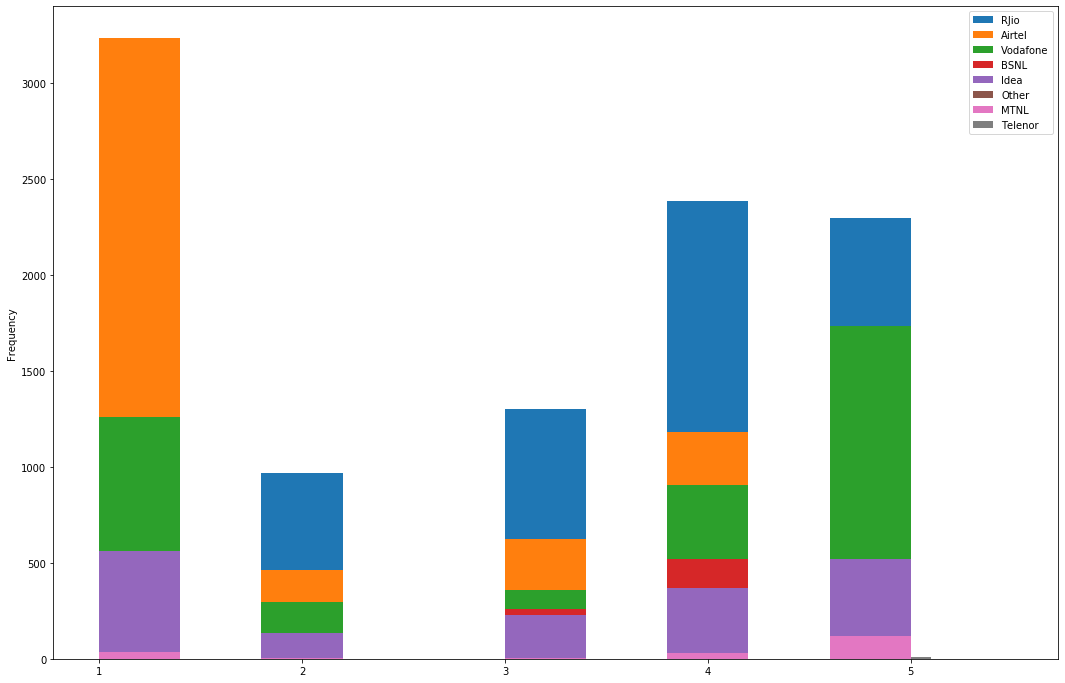

In [129]:
obj1=df_coll.loc["September"].groupby("Operator")
k=df_coll.loc["September"]["Operator"].unique()
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(18,12))
for i in range(len(k)):
    obj1.get_group(k[i])["Rating"].plot.hist(label=k[i])
plt.legend()
#september month was not happy for Airtel customers despite of large number of users

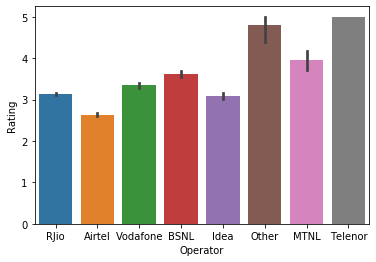

In [134]:
sns.barplot(data=df_coll.loc["September"],x="Operator",y="Rating")#mean plot